<a href="https://colab.research.google.com/github/mfinke17/Python/blob/main/Man2_heatmap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving Manuscript 2 all regression results.xlsx to Manuscript 2 all regression results (1).xlsx


In [9]:

import io

# Read the Excel file from the uploaded data
rr = pd.read_excel(io.BytesIO(uploaded['Manuscript 2 all regression results (1).xlsx']), sheet_name='Sheet2')

# Display the DataFrame
display(rr)


,Unnamed: 0,Spending more time outdoors during a heat wave puts me at higher risk for heat stroke.,Named weather events are more dangerous than others.,Healthy people don't need to change their daily routines during a heat wave.,I support the idea of naming heat waves,I know what to do to protect myself during a heat wave.,I am a person who does not need to worry in the event of a heat wave.,The local government is effectively working to protect me from heat waves.
0,Female,0.07,0.02,-0.10,-0.03,0.07,-0.11,-0.01
1,Younger (25-44),-0.01,0.02,0.05,-0.02,-0.04,0.05,-0.09
2,Older (60+),0.03,0.07,0.06,0.04,0.02,0.02,0.04
3,Low Income,-0.01,-0.01,0.02,0.05,-0.04,0.01,-0.05
4,High Income,0.01,0.03,-0.04,0.03,0.01,-0.01,-0.02
5,Health Status: Poor/Fair,0.01,0.01,-0.01,0.02,-0.11,-0.09,-0.05
6,Aided Awareness,0.02,0.10,0.03,0.24,0.03,0.04,0.13
7,Unaided Awareness,0.04,0.04,-0.05,0.14,0.01,0.01,0.09


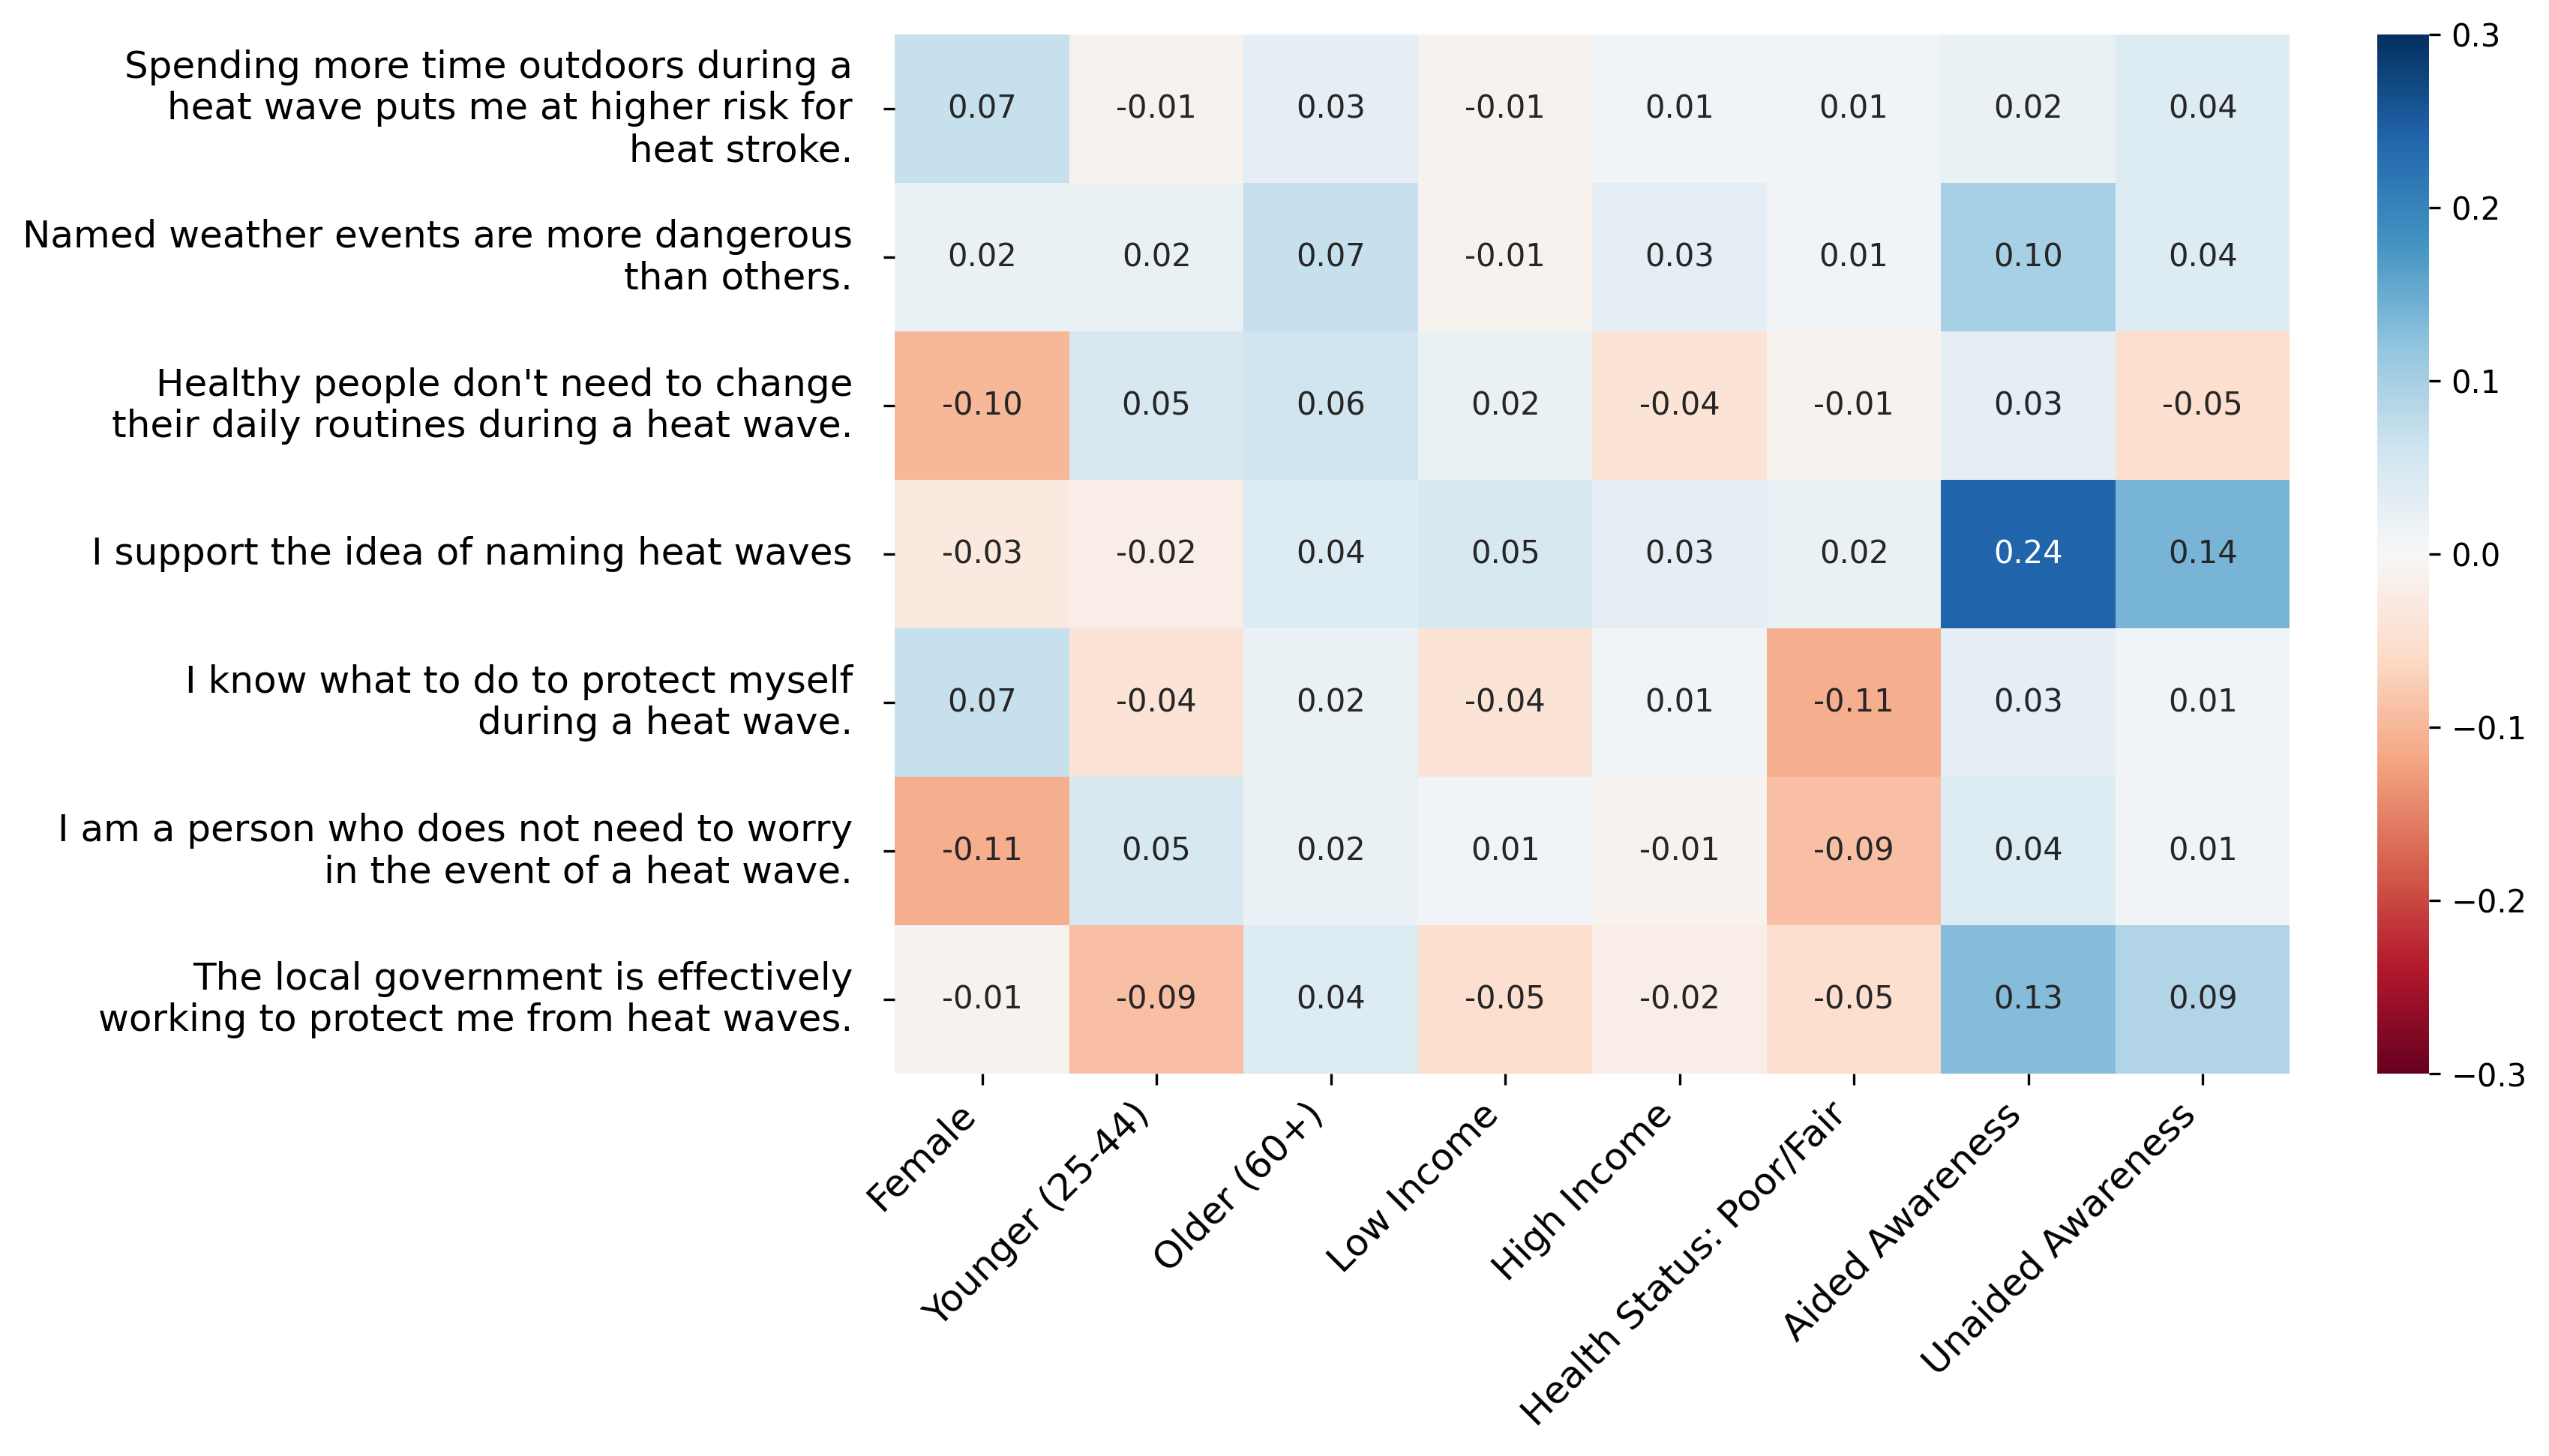

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap
import matplotlib as mpl

# Increase the default DPI for better resolution
mpl.rcParams['figure.dpi'] = 300

numeric_columns = rr.select_dtypes(include=['float', 'int']).columns

df = rr.rename(columns={'Unnamed: 0': ''})
df.set_index('', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

cmap = 'RdBu'

df_transposed = df.transpose()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
heatmap = sns.heatmap(df_transposed, fmt=".2f", annot=True, cmap=cmap, vmin=-0.3, vmax=0.3)

# Set the y-axis tick labels with proper wrapping
row_labels_multiline = [textwrap.fill(label, width=40) for label in df_transposed.index]
heatmap.set_yticklabels(row_labels_multiline, rotation=0, ha='right', fontsize=12)

# Adjust the spacing between y-axis tick labels and the y-axis
plt.tick_params(axis='y', pad=10)  # Increase the pad value as needed

# Set the x-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), ha='right', rotation=45, fontsize=12)
plt.xticks(rotation=45)

# Show the heatmap
plt.show()